In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [4]:
data=pd.read_csv("flipkartmobiles.csv")
data

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Xiaomi,Redmi 6 Pro,Black,Qualcomm,Small,32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
426,Xiaomi,Redmi 6 Pro,Red,Qualcomm,Small,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
427,Xiaomi,Mi 11 Lite,Others,Qualcomm,Large,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42
428,Xiaomi,Redmi 8A Dual,Blue,Qualcomm,Medium,32,3,6.2,2,1,5000,4.2,8161,8299,0.07,6.77


In [20]:
data.shape

(430, 16)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

In [27]:
data.isnull().sum()

brand               0
model               0
base_color          0
processor           0
screen_size         0
ROM                 0
RAM                 0
display_size        0
num_rear_camera     0
num_front_camera    0
battery_capacity    0
ratings             0
num_of_ratings      0
sales_price         0
discount_percent    0
sales               0
dtype: int64

# Brand with the more number of phones-Realme

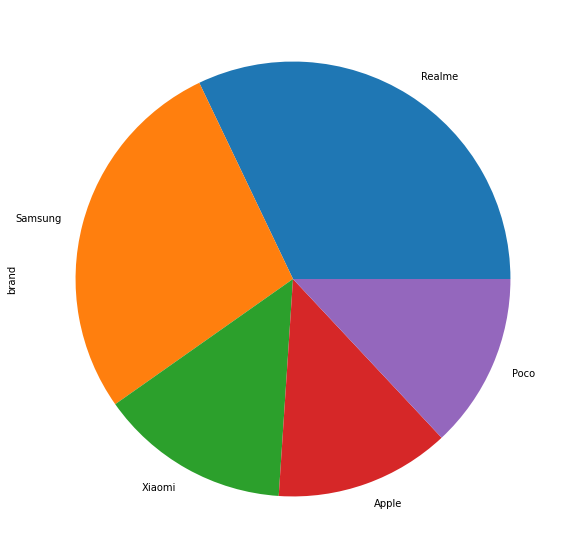

In [20]:
brandwise=data['brand'].value_counts().plot.pie(figsize=(10,10))

# Xiaomi had the most number of ratings

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_of_ratings', ylabel='brand'>

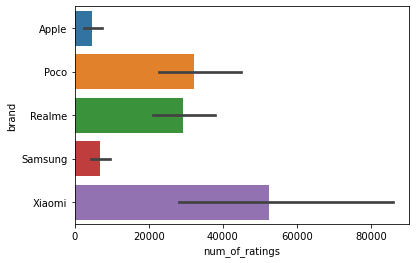

In [83]:
sns.barplot(data['num_of_ratings'],data['brand'])

# Blue was the most prefered color

<BarContainer object of 12 artists>

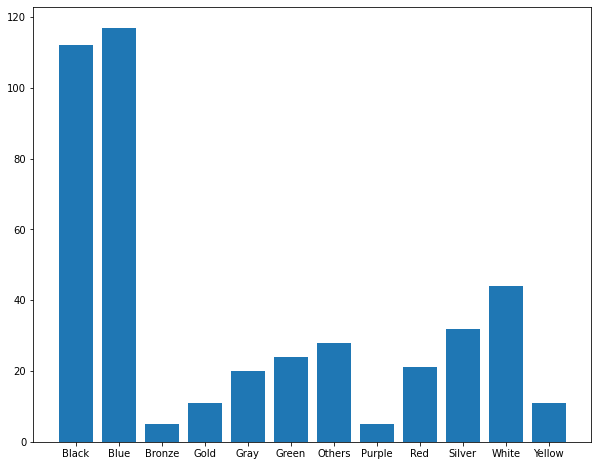

In [92]:
by_color=data.groupby(data['base_color'],as_index=False).model.count()
figure(figsize=(10,8))
plt.bar(by_color['base_color'],by_color['model'])

# Brands grouped based on the color of their models

In [7]:
brands_and_colors=data.groupby(['brand','model','base_color']).size().reset_index(name='Count')
brands_and_colors

,brand,model,base_color,Count
0,Apple,iPhone 12,Black,3
1,Apple,iPhone 12,Blue,3
2,Apple,iPhone 12,Green,3
3,Apple,iPhone 12,Purple,2
4,Apple,iPhone 12,Red,3
...,...,...,...,...
249,Xiaomi,Redmi Note 9 Pro,Gold,1
250,Xiaomi,Redmi Note 9 Pro,White,1
251,Xiaomi,Redmi Y2,Gold,1
252,Xiaomi,Redmi Y3,Black,1


# Brands grouped based on processors

In [15]:
processors=data.groupby(['brand','processor']).size().reset_index(name='Count')
processors

,brand,processor,Count
0,Apple,Ceramic,33
1,Apple,Water,11
2,Apple,iOS,12
3,Poco,MediaTek,23
4,Poco,Qualcomm,33
5,Realme,MediaTek,91
6,Realme,Others,6
7,Realme,Qualcomm,41
8,Samsung,Exynos,53
9,Samsung,MediaTek,25


<AxesSubplot:xlabel='brand', ylabel='Count'>

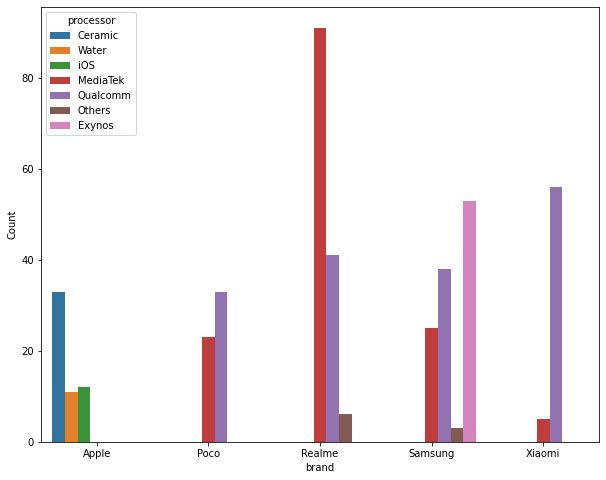

In [13]:
figure(figsize=(10,8))
sns.barplot(x='brand',y='Count',hue='processor',data=processors)

# Brands and their ratings

<AxesSubplot:xlabel='brand', ylabel='ratings'>

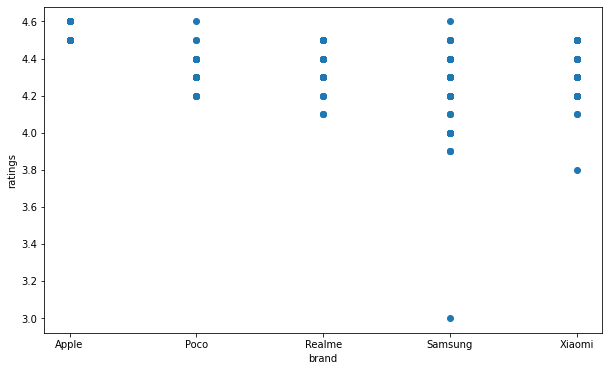

In [62]:
figure(figsize=(10,6))
sns.regplot(x = "brand", y="ratings",data=data, fit_reg = False, scatter_kws={"alpha": 1})

# GT Master Edition was the most sold phone in Realme and 6i was the least

GT Master Edition    9
X3 SuperZoom         6
7 Pro                6
Narzo 30             6
3i                   6
5 Pro                6
8 5G                 6
8 Pro                6
X7 Max               6
8                    6
X7 5G                4
Narzo 30 Pro 5G      4
C25                  4
C11 2021             4
Narzo 20             4
C2                   4
7                    4
C15                  4
Narzo 30A            4
C21                  4
Narzo 30 5G          4
X3                   3
GT 5G                3
Narzo 10A            3
6                    3
Narzo 20A            2
C20                  2
C11                  2
X7 Pro 5G            2
Narzo 20 Pro         2
C12                  2
8s 5G                2
C21Y                 2
Narzo 10             2
6i                   1
Name: model, dtype: int64


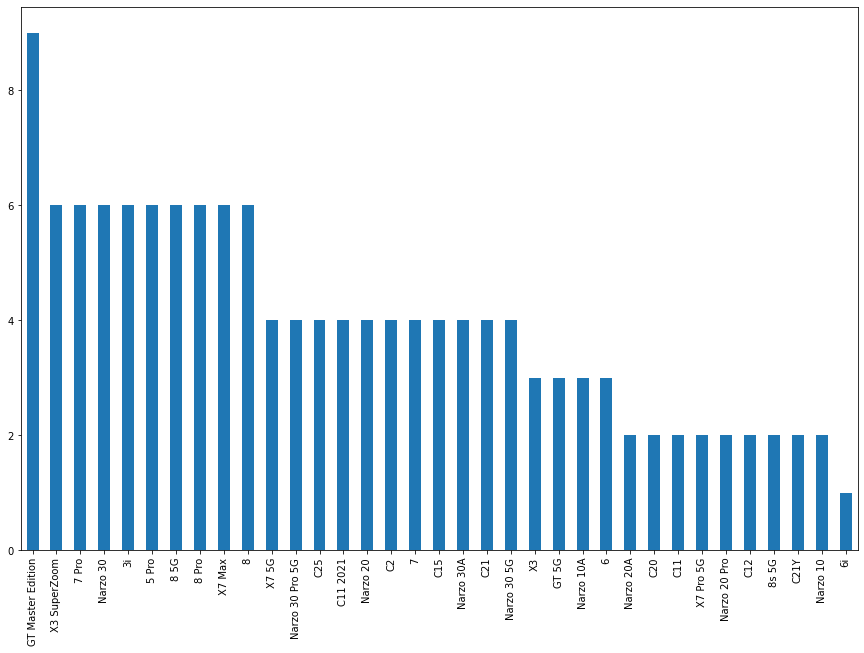

In [95]:
realme=data.loc[(data['brand']=='Realme','model')].value_counts()
realme.plot.bar(figsize=(15,10))
print(realme)

# iPhone XR was the most sold phone for Apple 

iPhone XR         18
iPhone 12         17
iPhone 12 Mini    16
iPhone SE          3
iPhone 8           1
iPhone 7 Plus      1
Name: model, dtype: int64


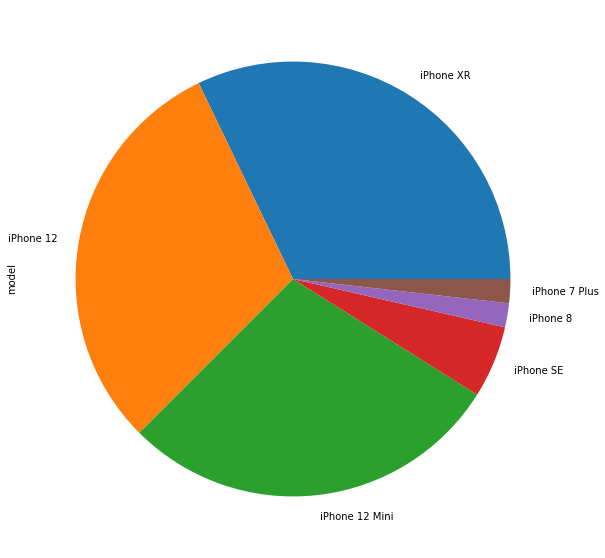

In [96]:
apple=data.loc[(data['brand']=='Apple','model')].value_counts()
apple.plot.pie(figsize=(10,10))
print(apple)

# A21s was the most sold model for Samsung 

Galaxy A21s                7
Galaxy F62                 6
Galaxy F12                 6
Galaxy F41                 6
Galaxy A03s                6
Galaxy A20s                5
Galaxy F02s                5
Galaxy A51                 5
Galaxy A12                 5
Galaxy F22                 4
Galaxy M02                 4
Galaxy A52s 5G             4
Galaxy Z Flip3 5G          4
Galaxy A22 5G              4
Galaxy A52                 3
Galaxy S20 FE              3
Galaxy Z Fold3 5G          3
Galaxy Note 20             3
Galaxy A50s                2
Galaxy Note 20 Ultra 5G    2
Galaxy M01                 2
Galaxy Grand 2             2
Galaxy J7 - 6              2
Galaxy A71                 2
Galaxy A72                 2
Galaxy M31                 2
Galaxy M32                 2
M02s                       2
Galaxy A31                 2
Galaxy M11                 1
Galaxy S21 Plus            1
Galaxy S21                 1
Galaxy Note10 Lite         1
Galaxy M30s                1
Galaxy M42    

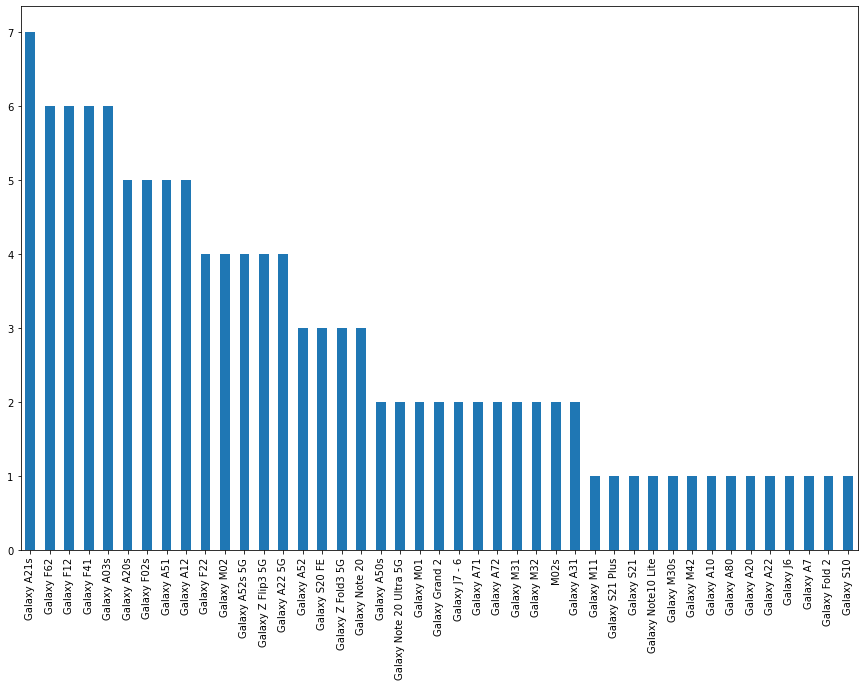

In [98]:
samsung=data.loc[(data['brand']=='Samsung','model')].value_counts()
samsung.plot.bar(figsize=(15,10))
print(samsung)